In [57]:
import os
import csv
import sys

path = 'offtarget'

fileOut=open('offtarget.WXS.csv',"w")
fileOut.write('ID,cov\n')

for f in os.listdir(path):
    file=open("./offtarget/"+f)
    reader=csv.reader(file)
    cov=0.0
    count=0
    for line in reader:
            x=int(line[1])
            y=int(line[2])
            if y>x:
                if line[3]=="":
                    n=0.0
                else:
                    n=float(line[3])
                cov+=n/(y-x)
                count+=1
        
    fileOut.write(f.replace('.offtarget.cov','')+","+str(cov/count))
    fileOut.write("\n")

In [58]:
import pandas as pd
df = pd.read_csv('offtarget.WXS.csv')
df.head()

,ID,cov
0,003860a34c9b244a5d8435b220ca5673,5.390855
1,04dad306f9be80db39f4be578091aa11,4.966536
2,08886fe521e2ff176295468dc519d9f3,3.162184
3,09f52a751a3bd08f2fd4dcc61a046ed0,4.683656
4,0e66d92c70e71ca68bc7df03f140ac23,3.325347


In [59]:
metadata=pd.read_csv('../outcomes/PILOT.WXS.clean.metadata.csv')
metadata.head()

,Unnamed: 0,patientBarcode,ID,sample,platform,clinical_data_age_at_diagnosis,clinical_data_age_at_initial_pathologic_diagnosis,clinical_data_agebegansmokinginyears,clinical_data_Breslow_thickness,clinical_data_cause_of_death,...,clinical_data_years_to_birth,datasource,disease,expData,ips_ctla4_neg_pd1_neg,ips_ctla4_neg_pd1_pos,ips_ctla4_pos_pd1_neg,ips_ctla4_pos_pd1_pos,patient_uuid,slides_0
0,1,TCGA-05-4244,C347.TCGA-05-4244-01A-01D-1105-08.5,TCGA-05-4244-01A-01D-1105-08,WGS,NaN,NaN,NaN,NaN,NaN,...,70.0,TCGA,LUAD,1,8.0,7.0,7.0,7.0,34040b83-7e8a-4264-a551-b16621843e28,NaN
1,2,TCGA-05-4420,C347.TCGA-05-4420-01A-01D-1265-08.3,TCGA-05-4420-01A-01D-1265-08,WGS,NaN,NaN,NaN,NaN,NaN,...,41.0,TCGA,LUAD,1,7.0,6.0,7.0,5.0,3d2aa654-1b5f-4eb4-a1c2-af31f5760069,NaN
2,3,TCGA-05-4430,C347.TCGA-05-4430-01A-02D-1265-08.3,TCGA-05-4430-01A-02D-1265-08,WGS,NaN,NaN,NaN,NaN,NaN,...,59.0,TCGA,LUAD,1,8.0,7.0,7.0,7.0,3a23cdb5-2327-45ac-b0b5-d4afe038c757,NaN
3,4,TCGA-05-5423,C509.TCGA-05-5423-01A-01D-1625-08.1,TCGA-05-5423-01A-01D-1625-08,WGS,NaN,NaN,NaN,NaN,NaN,...,65.0,TCGA,LUAD,1,8.0,7.0,8.0,7.0,33e3f736-7990-4f7a-ac35-863247566541,NaN
4,5,TCGA-17-Z004,C347.TCGA-17-Z004-01A-01W-0746-08.1,TCGA-17-Z004-01A-01W-0746-08,WGS,NaN,NaN,NaN,NaN,NaN,...,NaN,TCGA,LUAD,0,NaN,NaN,NaN,NaN,0d96def2-cf0a-4659-94e5-f08744c57cc6,NaN


In [60]:
data=pd.merge(df, metadata, on='ID')
data.head()

,ID,cov,Unnamed: 0,patientBarcode,sample,platform,clinical_data_age_at_diagnosis,clinical_data_age_at_initial_pathologic_diagnosis,clinical_data_agebegansmokinginyears,clinical_data_Breslow_thickness,...,clinical_data_years_to_birth,datasource,disease,expData,ips_ctla4_neg_pd1_neg,ips_ctla4_neg_pd1_pos,ips_ctla4_pos_pd1_neg,ips_ctla4_pos_pd1_pos,patient_uuid,slides_0
0,003860a34c9b244a5d8435b220ca5673,5.390855,194,TCGA-A2-A4S1,TCGA-A2-A4S1-01A-21D-A25Q-09,WGS,NaN,NaN,NaN,NaN,...,66.0,TCGA,BRCA,1,9.0,8.0,8.0,7.0,843c8f16-5e59-40d4-9ecc-8a75375156f6,NaN
1,04dad306f9be80db39f4be578091aa11,4.966536,246,TCGA-BH-A1EY,TCGA-BH-A1EY-01A-11D-A13L-09,WGS,NaN,NaN,NaN,NaN,...,79.0,TCGA,BRCA,1,7.0,6.0,7.0,6.0,0741b5db-4405-42ba-b63a-c6ee4f341480,NaN
2,08886fe521e2ff176295468dc519d9f3,3.162184,197,TCGA-A7-A13G,TCGA-A7-A13G-01B-04D-A22N-09,WGS,NaN,NaN,NaN,NaN,...,79.0,TCGA,BRCA,1,8.0,6.0,7.0,5.0,6cd9baf5-bbe0-4c1e-a87f-c53b3af22890,NaN
3,09f52a751a3bd08f2fd4dcc61a046ed0,4.683656,256,TCGA-C8-A1HK,TCGA-C8-A1HK-01A-21D-A13L-09,WGS,NaN,NaN,NaN,NaN,...,NaN,TCGA,BRCA,1,8.0,6.0,7.0,6.0,52c35691-efca-42f5-a03e-02c9f872275c,NaN
4,0e66d92c70e71ca68bc7df03f140ac23,3.325347,188,TCGA-A2-A25D,TCGA-A2-A25D-01A-12D-A16D-09,WGS,NaN,NaN,NaN,NaN,...,90.0,TCGA,BRCA,1,9.0,8.0,9.0,8.0,3b963d72-ba5c-467b-83c9-fbdb462510a3,NaN


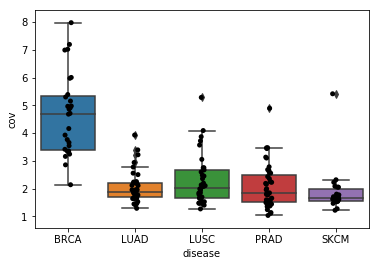

In [61]:
import seaborn as sns  #be sure version >=0.9
sns.boxplot(x="disease", y="cov", data=data)
sns.stripplot(x="disease", y="cov", data=data, palette=["black"], jitter=0.05)


In [62]:
#gi|23898|emb|X12811.1|  28      2
#gi|23898|emb|X12811.1|  29      2
#X12811    5S              2231 bp
#Human 5.8S ribosomal RNA J01866.1 159 bp 
#Human 28S ribosomal RNA gene  5025 bp M11167.1
# X03205.1 Human 18S ribosomal RNA 1869 bp 

import os
import csv
import sys

path = './rDNA/cov/'

fileOut_5S=open('5S.WXS.csv',"w")
fileOut_5S.write('ID,cov.5S\n')

fileOut_58S=open('58S.WXS.csv',"w")
fileOut_58S.write('ID,cov.58S\n')

fileOut_28S=open('28S.WXS.csv',"w")
fileOut_28S.write('ID,cov.28S\n')

fileOut_18S=open('18S.WXS.csv',"w")
fileOut_18S.write('ID,cov.18S\n')

for f in os.listdir(path):
    file=open("./rDNA/cov/"+f)
    reader=csv.reader(file, delimiter="\t")
    cov_5S=0
    cov_58S=0
    cov_28S=0
    cov_18S=0
    
    for line in reader:
        ref=line[0]
        n=int(line[2])
        if ref=="gi|23898|emb|X12811.1|":
            cov_5S+=n
        elif ref=="J01866.1":
            cov_58S+=n
        elif ref=="M11167.1":
            cov_28S+=n
        elif ref=="X03205.1":
            cov_18S+=n
        else:
            print "ERROR"
            print line
            sys.exit(1)
            
        
    fileOut_5S.write(f.replace('.sort.rDNA.cov','')+","+str(cov_5S/2231.0))
    fileOut_5S.write("\n")
    
    fileOut_58S.write(f.replace('.sort.rDNA.cov','')+","+str(cov_58S/159.0))
    fileOut_58S.write("\n")
    
    fileOut_28S.write(f.replace('.sort.rDNA.cov','')+","+str(cov_28S/5025.0))
    fileOut_28S.write("\n")
    
    fileOut_18S.write(f.replace('.sort.rDNA.cov','')+","+str(cov_18S/1869.0))
    fileOut_18S.write("\n")

#003860a34c9b244a5d8435b220ca5673,1062574
    
#003860a34c9b244a5d8435b220ca5673 12709

    

In [63]:
import pandas as pd
metadata=pd.read_csv('../outcomes/PILOT.WXS.clean.metadata.csv')
df_5S = pd.read_csv('5S.WXS.csv')
df_58S = pd.read_csv('58S.WXS.csv')
df_28S = pd.read_csv('28S.WXS.csv')
df_18S = pd.read_csv('18S.WXS.csv')

df = pd.read_csv('offtarget.WXS.csv')
data=pd.merge(df_5S, metadata, on='ID')
data=pd.merge(data, df, on='ID')
data=pd.merge(data, df_58S, on='ID')
data=pd.merge(data, df_28S, on='ID')
data=pd.merge(data, df_18S, on='ID')


data['cov.5S.norm'] = data['cov.5S']/data['cov']
data['cov.58S.norm'] = data['cov.58S']/data['cov']
data['cov.28S.norm'] = data['cov.28S']/data['cov']
data['cov.18S.norm'] = data['cov.18S']/data['cov']


data.head()



,ID,cov.5S,Unnamed: 0,patientBarcode,sample,platform,clinical_data_age_at_diagnosis,clinical_data_age_at_initial_pathologic_diagnosis,clinical_data_agebegansmokinginyears,clinical_data_Breslow_thickness,...,patient_uuid,slides_0,cov,cov.58S,cov.28S,cov.18S,cov.5S.norm,cov.58S.norm,cov.28S.norm,cov.18S.norm
0,003860a34c9b244a5d8435b220ca5673,5.696549,194,TCGA-A2-A4S1,TCGA-A2-A4S1-01A-21D-A25Q-09,WGS,NaN,NaN,NaN,NaN,...,843c8f16-5e59-40d4-9ecc-8a75375156f6,NaN,5.390855,2834.899371,70.610746,130.710005,1.056706,525.871894,13.098245,24.246617
1,04dad306f9be80db39f4be578091aa11,16.363066,246,TCGA-BH-A1EY,TCGA-BH-A1EY-01A-11D-A13L-09,WGS,NaN,NaN,NaN,NaN,...,0741b5db-4405-42ba-b63a-c6ee4f341480,NaN,4.966536,946.503145,194.582090,261.747994,3.294664,190.576112,39.178632,52.702324
2,08886fe521e2ff176295468dc519d9f3,7.967727,197,TCGA-A7-A13G,TCGA-A7-A13G-01B-04D-A22N-09,WGS,NaN,NaN,NaN,NaN,...,6cd9baf5-bbe0-4c1e-a87f-c53b3af22890,NaN,3.162184,3307.685535,18.621891,157.719101,2.519691,1046.013017,5.888933,49.876638
3,09f52a751a3bd08f2fd4dcc61a046ed0,13.939041,256,TCGA-C8-A1HK,TCGA-C8-A1HK-01A-21D-A13L-09,WGS,NaN,NaN,NaN,NaN,...,52c35691-efca-42f5-a03e-02c9f872275c,NaN,4.683656,984.308176,200.056119,286.082397,2.976103,210.158105,42.713670,61.081007
4,0e66d92c70e71ca68bc7df03f140ac23,13.560287,188,TCGA-A2-A25D,TCGA-A2-A25D-01A-12D-A16D-09,WGS,NaN,NaN,NaN,NaN,...,3b963d72-ba5c-467b-83c9-fbdb462510a3,NaN,3.325347,856.628931,165.016119,286.418941,4.077857,257.605910,49.623736,86.132057


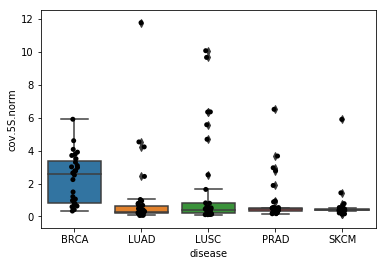

In [64]:
import seaborn as sns  #be sure version >=0.9
sns.boxplot(x="disease", y="cov.5S.norm", data=data)
sns.stripplot(x="disease", y="cov.5S.norm", data=data, palette=["black"], jitter=0.05)

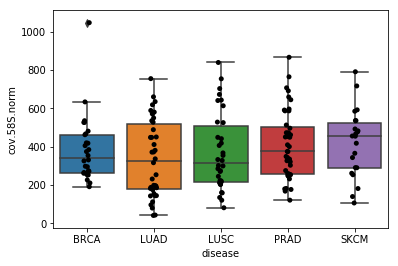

In [65]:
import seaborn as sns  #be sure version >=0.9
sns.boxplot(x="disease", y="cov.58S.norm", data=data)
sns.stripplot(x="disease", y="cov.58S.norm", data=data, palette=["black"], jitter=0.05)

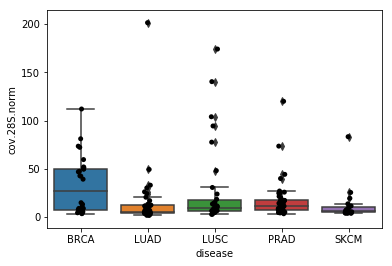

In [66]:
import seaborn as sns  #be sure version >=0.9
sns.boxplot(x="disease", y="cov.28S.norm", data=data)
sns.stripplot(x="disease", y="cov.28S.norm", data=data, palette=["black"], jitter=0.05)

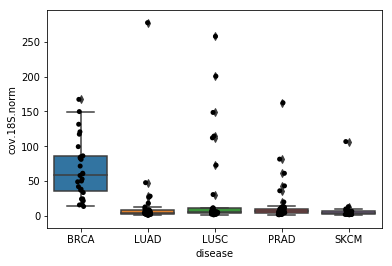

In [67]:
import seaborn as sns  #be sure version >=0.9
sns.boxplot(x="disease", y="cov.18S.norm", data=data)
sns.stripplot(x="disease", y="cov.18S.norm", data=data, palette=["black"], jitter=0.05)

(0.9547869543398257, 8.782522740921786e-88)

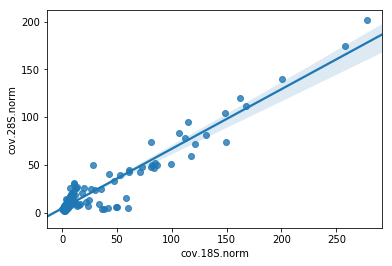

In [68]:
import scipy.stats  as stats

sns.regplot(x="cov.18S.norm", y="cov.28S.norm", data=data)
stats.pearsonr(data['cov.18S.norm'], data['cov.28S.norm'])

(0.9431981250855755, 6.530571899633595e-80)

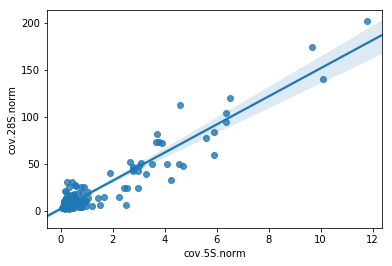

In [69]:
import scipy.stats  as stats

sns.regplot(x="cov.5S.norm", y="cov.28S.norm", data=data)
stats.pearsonr(data['cov.5S.norm'], data['cov.28S.norm'])

(-0.03248076657261367, 0.67875659632249)

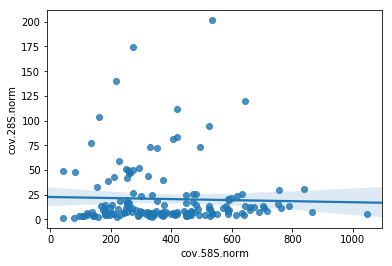

In [70]:
import scipy.stats  as stats

sns.regplot(x="cov.58S.norm", y="cov.28S.norm", data=data)
stats.pearsonr(data['cov.58S.norm'], data['cov.28S.norm'])

In [71]:
#gi|23898|emb|X12811.1|  28      2
#gi|23898|emb|X12811.1|  29      2
#MT 16569 bp    DNA



import os
import csv
import sys

path = './MT/cov/'

fileOut=open('MT.WXS.csv',"w")
fileOut.write('ID,cov.MT\n')



for f in os.listdir(path):
    file=open("./MT/cov/"+f)
    reader=csv.reader(file, delimiter="\t")
    cov=0
    
    
    for line in reader:
        ref=line[0]
        n=int(line[2])
        cov+=n
        
            
        
    fileOut.write(f.replace('.sort.MT.cov','')+","+str(cov/16569.0))
    fileOut.write("\n")
    
    

In [10]:
import pandas as pd
metadata=pd.read_csv('../outcomes/PILOT.WXS.clean.metadata.csv')
df_MT = pd.read_csv('MT.WXS.csv')

df_MT.head()

df = pd.read_csv('offtarget.WXS.csv')
data=pd.merge(df_MT, metadata, on='ID')
data_cov_WXS=pd.merge(df, data, on='ID')


data_cov_WXS['cov.MT.norm'] = data_cov_WXS['cov.MT']/data_cov_WXS['cov']

data.head()



,ID,cov.MT,Unnamed: 0,patientBarcode,sample,platform,clinical_data_age_at_diagnosis,clinical_data_age_at_initial_pathologic_diagnosis,clinical_data_agebegansmokinginyears,clinical_data_Breslow_thickness,...,clinical_data_years_to_birth,datasource,disease,expData,ips_ctla4_neg_pd1_neg,ips_ctla4_neg_pd1_pos,ips_ctla4_pos_pd1_neg,ips_ctla4_pos_pd1_pos,patient_uuid,slides_0
0,003860a34c9b244a5d8435b220ca5673,60.111896,194,TCGA-A2-A4S1,TCGA-A2-A4S1-01A-21D-A25Q-09,WGS,NaN,NaN,NaN,NaN,...,66.0,TCGA,BRCA,1,9.0,8.0,8.0,7.0,843c8f16-5e59-40d4-9ecc-8a75375156f6,NaN
1,04dad306f9be80db39f4be578091aa11,194.140141,246,TCGA-BH-A1EY,TCGA-BH-A1EY-01A-11D-A13L-09,WGS,NaN,NaN,NaN,NaN,...,79.0,TCGA,BRCA,1,7.0,6.0,7.0,6.0,0741b5db-4405-42ba-b63a-c6ee4f341480,NaN
2,08886fe521e2ff176295468dc519d9f3,43.398334,197,TCGA-A7-A13G,TCGA-A7-A13G-01B-04D-A22N-09,WGS,NaN,NaN,NaN,NaN,...,79.0,TCGA,BRCA,1,8.0,6.0,7.0,5.0,6cd9baf5-bbe0-4c1e-a87f-c53b3af22890,NaN
3,09f52a751a3bd08f2fd4dcc61a046ed0,295.264168,256,TCGA-C8-A1HK,TCGA-C8-A1HK-01A-21D-A13L-09,WGS,NaN,NaN,NaN,NaN,...,NaN,TCGA,BRCA,1,8.0,6.0,7.0,6.0,52c35691-efca-42f5-a03e-02c9f872275c,NaN
4,0e66d92c70e71ca68bc7df03f140ac23,434.680186,188,TCGA-A2-A25D,TCGA-A2-A25D-01A-12D-A16D-09,WGS,NaN,NaN,NaN,NaN,...,90.0,TCGA,BRCA,1,9.0,8.0,9.0,8.0,3b963d72-ba5c-467b-83c9-fbdb462510a3,NaN


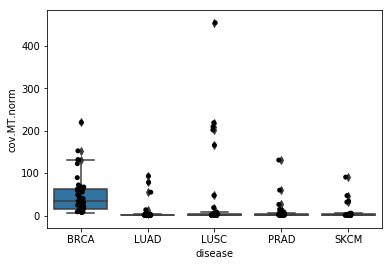

In [95]:
df_MT_div = pd.read_csv('MT.diversity.WXS.csv')
df_MT_div.head()
metadata=pd.read_csv('../outcomes/PILOT.WXS.clean.metadata.csv')
data_div_WXS=pd.merge(df_MT_div, metadata, on='ID')
data_div_WXS.head()

    

,ID,average.MT.div,max.MT.div,Unnamed: 0,patientBarcode,sample,platform,clinical_data_age_at_diagnosis,clinical_data_age_at_initial_pathologic_diagnosis,clinical_data_agebegansmokinginyears,...,clinical_data_years_to_birth,datasource,disease,expData,ips_ctla4_neg_pd1_neg,ips_ctla4_neg_pd1_pos,ips_ctla4_pos_pd1_neg,ips_ctla4_pos_pd1_pos,patient_uuid,slides_0
0,003860a34c9b244a5d8435b220ca5673,0.285526,0.971534,194,TCGA-A2-A4S1,TCGA-A2-A4S1-01A-21D-A25Q-09,WGS,NaN,NaN,NaN,...,66.0,TCGA,BRCA,1,9.0,8.0,8.0,7.0,843c8f16-5e59-40d4-9ecc-8a75375156f6,NaN
1,04dad306f9be80db39f4be578091aa11,0.014886,0.226411,246,TCGA-BH-A1EY,TCGA-BH-A1EY-01A-11D-A13L-09,WGS,NaN,NaN,NaN,...,79.0,TCGA,BRCA,1,7.0,6.0,7.0,6.0,0741b5db-4405-42ba-b63a-c6ee4f341480,NaN
2,08886fe521e2ff176295468dc519d9f3,0.325265,1.000000,197,TCGA-A7-A13G,TCGA-A7-A13G-01B-04D-A22N-09,WGS,NaN,NaN,NaN,...,79.0,TCGA,BRCA,1,8.0,6.0,7.0,5.0,6cd9baf5-bbe0-4c1e-a87f-c53b3af22890,NaN
3,09f52a751a3bd08f2fd4dcc61a046ed0,0.008254,0.057301,256,TCGA-C8-A1HK,TCGA-C8-A1HK-01A-21D-A13L-09,WGS,NaN,NaN,NaN,...,NaN,TCGA,BRCA,1,8.0,6.0,7.0,6.0,52c35691-efca-42f5-a03e-02c9f872275c,NaN
4,0e66d92c70e71ca68bc7df03f140ac23,0.110097,0.793128,188,TCGA-A2-A25D,TCGA-A2-A25D-01A-12D-A16D-09,WGS,NaN,NaN,NaN,...,90.0,TCGA,BRCA,1,9.0,8.0,9.0,8.0,3b963d72-ba5c-467b-83c9-fbdb462510a3,NaN


Text(0.5,1,'Mt diversity WXS')

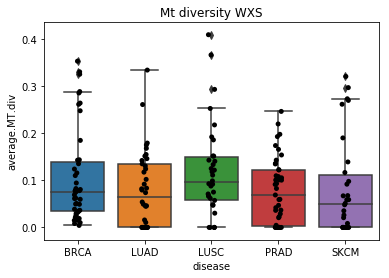

In [75]:
##ID,average.MT.div,max.MT.div

import seaborn as sns  #be sure version >=0.9
sns.boxplot(x="disease", y="average.MT.div", data=data)
ax=sns.stripplot(x="disease", y="average.MT.div", data=data, palette=["black"], jitter=0.05)
ax.set_title('Mt diversity WXS')



In [76]:
import os
import csv
import sys

path = './MT.RNA.Seq/cov/'

fileOut=open('MT.RNA.Seq.csv',"w")
fileOut.write('ID,cov.MT\n')



for f in os.listdir(path):
    file=open("./MT.RNA.Seq/cov/"+f)
    reader=csv.reader(file, delimiter="\t")
    cov=0
    
    
    for line in reader:
        ref=line[0]
        n=int(line[2])
        cov+=n
        
            
        
    fileOut.write(f.replace('.sort.MT.cov','')+","+str(cov/16569.0))
    fileOut.write("\n")

In [8]:
import pandas as pd
metadata=pd.read_csv('../outcomes/PILOT.RNASeq.clean.metadata.csv')
df_MT = pd.read_csv('MT.RNA.Seq.csv')
data=pd.merge(df_MT, metadata, on='ID')

depth_RNASeq=pd.read_csv('../bams/NR.RNASeq.csv')
data_RNASeq_cov=pd.merge(data, depth_RNASeq, on='ID')

data_RNASeq_cov['cov.MT.RNASeq.norm'] = (data_RNASeq_cov['cov.MT.RNASeq']/data_RNASeq_cov['NR'])*1000000


data_RNASeq_cov.head()

,ID,cov.MT.RNASeq,Unnamed: 0,patientBarcode,sample,platform,clinical_data_age_at_diagnosis,clinical_data_age_at_initial_pathologic_diagnosis,clinical_data_agebegansmokinginyears,clinical_data_Breslow_thickness,...,disease,expData,ips_ctla4_neg_pd1_neg,ips_ctla4_neg_pd1_pos,ips_ctla4_pos_pd1_neg,ips_ctla4_pos_pd1_pos,patient_uuid,slides_0,NR,cov.MT.RNASeq.norm
0,022dd75d-0977-40b5-8804-bf0a281c149b_gdc_realn...,446.944294,9,TCGA-21-1082,TCGA-21-1082-01A-01R-0692-07,RNASeq,NaN,NaN,NaN,NaN,...,LUSC,1,8.0,7.0,8.0,6.0,0e2ee54a-51c9-4868-842d-a2a1c1cfb016,NaN,198787931,2.248347
1,06ab660e-2766-4c97-8f2e-b8495ddc0880_gdc_realn...,358.926912,230,TCGA-BF-A5EP,TCGA-BF-A5EP-01A-12R-A27Q-07,RNASeq,NaN,NaN,NaN,70.0,...,SKCM,1,8.0,6.0,8.0,6.0,888ef0fc-fc84-4afb-a369-695fee5ae4f6,NaN,147474518,2.433823
2,0ade1371-b218-4f01-a39e-b503d30d24e0_gdc_realn...,209.912910,373,TCGA-HC-7210,TCGA-HC-7210-01A-11R-2118-07,RNASeq,NaN,NaN,NaN,NaN,...,PRAD,1,7.0,6.0,7.0,5.0,6a5af80e-07ad-4cd3-aaab-5db1090835d9,NaN,182321782,1.151332
3,0afa74a0-7a7c-4b48-a253-45070049ceea_gdc_realn...,150.618806,281,TCGA-E2-A9RU,TCGA-E2-A9RU-01A-11R-A41B-07,RNASeq,NaN,NaN,NaN,NaN,...,BRCA,1,7.0,6.0,7.0,6.0,6f18f96e-c0c9-4cc4-9fb2-cba8949d5402,NaN,110796277,1.359421
4,0e0dd65a-4a41-4f6c-9ff9-d3cea84de4d7_gdc_realn...,136.492546,381,TCGA-HC-7817,TCGA-HC-7817-01B-11R-A29R-07,RNASeq,NaN,NaN,NaN,NaN,...,PRAD,1,9.0,7.0,8.0,7.0,f3aa40b9-7b4d-465a-b7c9-591aebdb56c2,NaN,136112777,1.002790


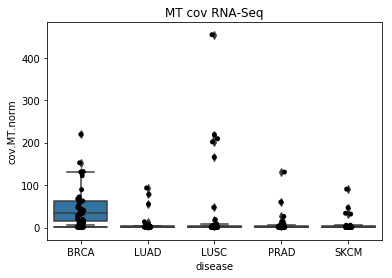

In [12]:
import seaborn as sns  #be sure version >=0.9
sns.boxplot(x="disease", y="cov.MT.RNASeq.norm", data=data_RNASeq_cov).set_title("MT cov RNA-Seq")
sns.stripplot(x="disease", y="cov.MT.RNASeq.norm", data=data_RNASeq_cov, palette=["black"], jitter=0.05)


import seaborn as sns  #be sure version >=0.9
sns.boxplot(x="disease", y="cov.MT.norm", data=data_cov_WXS)
sns.stripplot(x="disease", y="cov.MT.norm", data=data_cov_WXS, palette=["black"], jitter=0.05)


In [107]:
df_MT_div_RNASeq = pd.read_csv('MT.diversity.RNASeq.csv')
df_MT_div_RNASeq.head()
metadata=pd.read_csv('../outcomes/PILOT.RNASeq.clean.metadata.csv')
data_div_RNASeq=pd.merge(df_MT_div_RNASeq, metadata, on='ID')

data_div_RNASeq2 = data_div_RNASeq[['ID', 'average.MT.div.RNA.seq','patientBarcode','disease']].copy()

data_div_RNASeq2.head()


,ID,average.MT.div.RNA.seq,patientBarcode,disease
0,022dd75d-0977-40b5-8804-bf0a281c149b_gdc_realn...,0.142216,TCGA-21-1082,LUSC
1,06ab660e-2766-4c97-8f2e-b8495ddc0880_gdc_realn...,0.206278,TCGA-BF-A5EP,SKCM
2,0ade1371-b218-4f01-a39e-b503d30d24e0_gdc_realn...,0.213427,TCGA-HC-7210,PRAD
3,0afa74a0-7a7c-4b48-a253-45070049ceea_gdc_realn...,0.262498,TCGA-E2-A9RU,BRCA
4,0e0dd65a-4a41-4f6c-9ff9-d3cea84de4d7_gdc_realn...,0.291777,TCGA-HC-7817,PRAD


Text(0.5,1,'Mt diversity RNASeq')

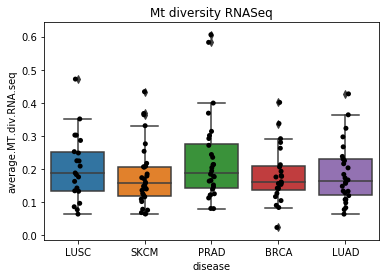

In [93]:
##ID,average.MT.div,max.MT.div

import seaborn as sns  #be sure version >=0.9
sns.boxplot(x="disease", y="average.MT.div.RNA.seq", data=data_div_RNASeq)
ax=sns.stripplot(x="disease", y="average.MT.div.RNA.seq", data=data_div_RNASeq, palette=["black"], jitter=0.05)
ax.set_title('Mt diversity RNASeq')

In [113]:
df_MT_div_WXS = pd.read_csv('MT.diversity.WXS.csv')
metadata=pd.read_csv('../outcomes/PILOT.WXS.clean.metadata.csv')
data_div_WXS=pd.merge(df_MT_div_WXS, metadata, on='ID')
data_div_WXS2 = data_div_WXS[['ID', 'average.MT.div','patientBarcode','disease']].copy()
data_div_WXS2.head()


,ID,average.MT.div,patientBarcode,disease
0,003860a34c9b244a5d8435b220ca5673,0.285526,TCGA-A2-A4S1,BRCA
1,04dad306f9be80db39f4be578091aa11,0.014886,TCGA-BH-A1EY,BRCA
2,08886fe521e2ff176295468dc519d9f3,0.325265,TCGA-A7-A13G,BRCA
3,09f52a751a3bd08f2fd4dcc61a046ed0,0.008254,TCGA-C8-A1HK,BRCA
4,0e66d92c70e71ca68bc7df03f140ac23,0.110097,TCGA-A2-A25D,BRCA


In [115]:
data_div_both=pd.merge(data_div_WXS2, data_div_RNASeq2, on='patientBarcode')
data_div_both.head()

,ID_x,average.MT.div,patientBarcode,disease_x,ID_y,average.MT.div.RNA.seq,disease_y
0,04dad306f9be80db39f4be578091aa11,0.014886,TCGA-BH-A1EY,BRCA,3ea7a215-73c4-4e11-94f3-2aa03325349e_gdc_realn...,0.152993,BRCA
1,1194ab7c994b6a6e775de7260c86068c,0.094362,TCGA-A7-A6VW,BRCA,cc68e6a2-0865-4656-80fb-2594a64ffba9_gdc_realn...,0.116198,BRCA
2,1afc6bc8152648c1a4ea85bc89ab926a,0.050849,TCGA-EW-A1J2,BRCA,fa14f063-b1b6-4e56-9b5c-c9c1248f5d1f_gdc_realn...,0.192769,BRCA
3,25afb594517b6fc2c6bc85a0c66b667c,0.029527,TCGA-E9-A22G,BRCA,6c5a23c8-70b3-4bb3-842d-42b048978f1e_gdc_realn...,0.089816,BRCA
4,278ba239dee396794cbfdd659cef87f6,0.075519,TCGA-OL-A6VR,BRCA,3bda51f4-6075-4f3c-a8ca-92b72d0d8e73_gdc_realn...,0.126161,BRCA


(-0.0817877552194024, 0.6112046167348943)

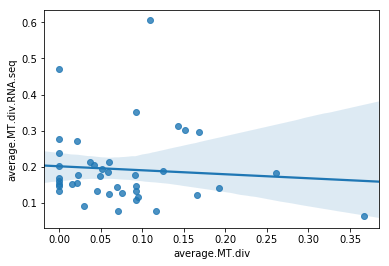

In [130]:
import scipy.stats  as stats
sns.regplot(x="average.MT.div", y="average.MT.div.RNA.seq",data=data_div_both)
stats.pearsonr(data_div_both['average.MT.div'], data_div_both['average.MT.div.RNA.seq'])


In [128]:
df_MT_cov_WXS = pd.read_csv('MT.WXS.csv')
metadata=pd.read_csv('../outcomes/PILOT.WXS.clean.metadata.csv')
data_cov_WXS=pd.merge(df_MT_cov_WXS, metadata, on='ID')
data_cov_WXS2 = data_cov_WXS[['ID', 'cov.MT','patientBarcode','disease']].copy()

df_MT_cov_RNASeq = pd.read_csv('MT.RNA.Seq.csv')
metadata=pd.read_csv('../outcomes/PILOT.RNASeq.clean.metadata.csv')
data_cov_RNASeq=pd.merge(df_MT_cov_RNASeq, metadata, on='ID')
data_cov_RNASeq2 = data_cov_RNASeq[['ID', 'cov.MT.RNASeq','patientBarcode','disease']].copy()

data_cov_both=pd.merge(data_cov_WXS2, data_cov_RNASeq2, on='patientBarcode')
data_cov_both.head()


,ID_x,cov.MT,patientBarcode,disease_x,ID_y,cov.MT.RNASeq,disease_y
0,04dad306f9be80db39f4be578091aa11,194.140141,TCGA-BH-A1EY,BRCA,3ea7a215-73c4-4e11-94f3-2aa03325349e_gdc_realn...,207.892329,BRCA
1,1194ab7c994b6a6e775de7260c86068c,127.348301,TCGA-A7-A6VW,BRCA,cc68e6a2-0865-4656-80fb-2594a64ffba9_gdc_realn...,82.105438,BRCA
2,25afb594517b6fc2c6bc85a0c66b667c,233.947009,TCGA-E9-A22G,BRCA,6c5a23c8-70b3-4bb3-842d-42b048978f1e_gdc_realn...,233.265134,BRCA
3,278ba239dee396794cbfdd659cef87f6,145.579093,TCGA-OL-A6VR,BRCA,3bda51f4-6075-4f3c-a8ca-92b72d0d8e73_gdc_realn...,141.238880,BRCA
4,39300c8aac13e03d467f7a274c0a7b6c,109.992094,TCGA-HN-A2OB,BRCA,6bc88daf-bcd3-4343-9aa5-bb69a90d6503_gdc_realn...,157.498883,BRCA


(-0.14663132697894038, 0.38648741562971145)

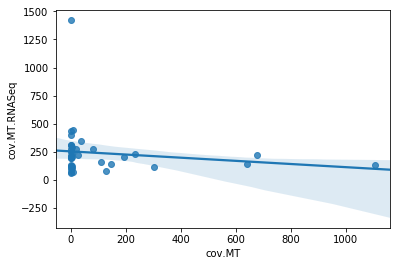

In [135]:
import scipy.stats  as stats
sns.regplot(x="cov.MT", y="cov.MT.RNASeq",data=data_cov_both)
stats.pearsonr(data_cov_both['cov.MT'], data_cov_both['cov.MT.RNASeq'])

In [152]:
df_imrep_RNASeq = pd.read_csv('imrep.RNASeq.csv')

metadata=pd.read_csv('../outcomes/PILOT.RNASeq.clean.metadata.csv')
data_imrep_RNASeq=pd.merge(df_imrep_RNASeq, metadata, on='ID')
data_imrep_RNASeq.head()
#data_imrep_RNASeq2 = data_cov_RNASeq[['ID', 'cov.MT.RNASeq','patientBarcode','disease']].copy()



,ID,nIGH2,nIGK2,nIGL2,nTCRA2,nTCRB2,nTCRD2,nTCRG2,loadIGH2,loadIGK2,...,clinical_data_years_to_birth,datasource,disease,expData,ips_ctla4_neg_pd1_neg,ips_ctla4_neg_pd1_pos,ips_ctla4_pos_pd1_neg,ips_ctla4_pos_pd1_pos,patient_uuid,slides_0
0,06ab660e-2766-4c97-8f2e-b8495ddc0880_gdc_realn...,0,1,3,8,0,0,0,0,4,...,75.0,TCGA,SKCM,1,8.0,6.0,8.0,6.0,888ef0fc-fc84-4afb-a369-695fee5ae4f6,NaN
1,0ade1371-b218-4f01-a39e-b503d30d24e0_gdc_realn...,31,391,118,98,2,0,0,134,1733,...,74.0,TCGA,PRAD,1,7.0,6.0,7.0,5.0,6a5af80e-07ad-4cd3-aaab-5db1090835d9,NaN
2,0afa74a0-7a7c-4b48-a253-45070049ceea_gdc_realn...,2,33,17,11,0,1,0,5,117,...,90.0,TCGA,BRCA,1,7.0,6.0,7.0,6.0,6f18f96e-c0c9-4cc4-9fb2-cba8949d5402,NaN
3,0e0dd65a-4a41-4f6c-9ff9-d3cea84de4d7_gdc_realn...,10,205,98,43,2,2,1,51,810,...,52.0,TCGA,PRAD,1,9.0,7.0,8.0,7.0,f3aa40b9-7b4d-465a-b7c9-591aebdb56c2,NaN
4,0f3494df-6f55-4e6e-8e67-b7bfdecc8dec_gdc_realn...,25,105,51,412,4,2,0,177,678,...,74.0,TCGA,BRCA,1,8.0,6.0,7.0,5.0,dbb2da92-99dd-400c-bc05-e87d7273656c,NaN


Text(0.5,1,'nIGH RNASeq')

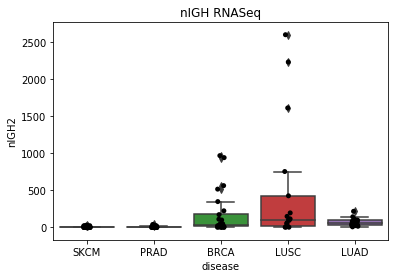

In [139]:
import seaborn as sns  #be sure version >=0.9
sns.boxplot(x="disease", y="nIGH2", data=data_imrep_RNASeq)
ax=sns.stripplot(x="disease", y="nIGH2", data=data_imrep_RNASeq, palette=["black"], jitter=0.05)
ax.set_title('nIGH RNASeq')

Text(0.5,1,'nTCRA2 RNASeq')

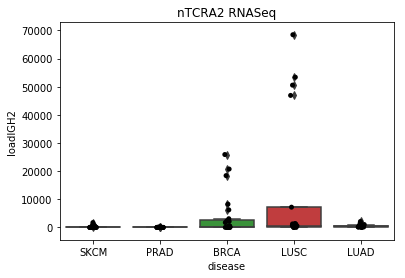

In [153]:
import seaborn as sns  #be sure version >=0.9
sns.boxplot(x="disease", y="loadIGH2", data=data_imrep_RNASeq)
ax=sns.stripplot(x="disease", y="loadIGH2", data=data_imrep_RNASeq, palette=["black"], jitter=0.05)
ax.set_title('load IGH RNASeq')

Text(0.5,1,'diversity IGH RNASeq')

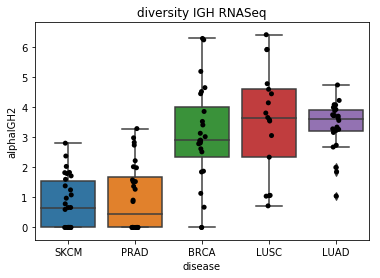

In [155]:
import seaborn as sns  #be sure version >=0.9
sns.boxplot(x="disease", y="alphaIGH2", data=data_imrep_RNASeq)
ax=sns.stripplot(x="disease", y="alphaIGH2", data=data_imrep_RNASeq, palette=["black"], jitter=0.05)
ax.set_title('diversity IGH RNASeq')

Text(0.5,1,'nTCRA2 RNASeq')

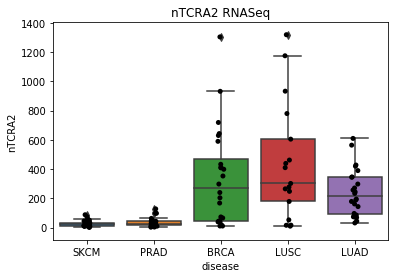

In [156]:
import seaborn as sns  #be sure version >=0.9
sns.boxplot(x="disease", y="nTCRA2", data=data_imrep_RNASeq)
ax=sns.stripplot(x="disease", y="nTCRA2", data=data_imrep_RNASeq, palette=["black"], jitter=0.05)
ax.set_title('nTCRA2 RNASeq')

Text(0.5,1,'loadTCRA2 RNASeq')

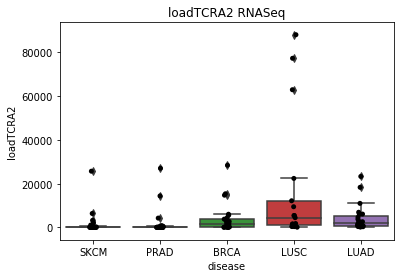

In [157]:
import seaborn as sns  #be sure version >=0.9
sns.boxplot(x="disease", y="loadTCRA2", data=data_imrep_RNASeq)
ax=sns.stripplot(x="disease", y="loadTCRA2", data=data_imrep_RNASeq, palette=["black"], jitter=0.05)
ax.set_title('loadTCRA2 RNASeq')

Text(0.5,1,'alphaTCRA2 RNASeq')

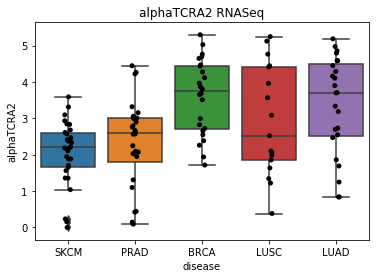

In [165]:
import seaborn as sns  #be sure version >=0.9
sns.boxplot(x="disease", y="alphaTCRA2", data=data_imrep_RNASeq)
ax=sns.stripplot(x="disease", y="alphaTCRA2", data=data_imrep_RNASeq, palette=["black"], jitter=0.05)
ax.set_title('alphaTCRA2 RNASeq')

In [175]:
df_imrep_WXS = pd.read_csv('imrep.WXS.csv')
metadata=pd.read_csv('../outcomes/PILOT.WXS.clean.metadata.csv')
data_imrep_WXS=pd.merge(df_imrep_WXS, metadata, on='ID')
df = pd.read_csv('offtarget.WXS.csv')
data_imrep_WXS=pd.merge(data_imrep_WXS, df, on='ID')

data_imrep_WXS['nIGH_norm'] = data_imrep_WXS['nIGH']/data_imrep_WXS['cov']

data_imrep_WXS.head()

,ID,nIGH,nIGK,nIGL,nTCRA,nTCRB,nTCRD,nTCRG,loadIGH,loadIGK,...,disease,expData,ips_ctla4_neg_pd1_neg,ips_ctla4_neg_pd1_pos,ips_ctla4_pos_pd1_neg,ips_ctla4_pos_pd1_pos,patient_uuid,slides_0,cov,nIGH_norm
0,003860a34c9b244a5d8435b220ca5673,0,0,0,3,0,0,0,0,0,...,BRCA,1,9.0,8.0,8.0,7.0,843c8f16-5e59-40d4-9ecc-8a75375156f6,NaN,5.390855,0.0
1,04dad306f9be80db39f4be578091aa11,0,1,0,22,1,0,2,0,2,...,BRCA,1,7.0,6.0,7.0,6.0,0741b5db-4405-42ba-b63a-c6ee4f341480,NaN,4.966536,0.0
2,08886fe521e2ff176295468dc519d9f3,0,0,0,76,0,1,0,0,0,...,BRCA,1,8.0,6.0,7.0,5.0,6cd9baf5-bbe0-4c1e-a87f-c53b3af22890,NaN,3.162184,0.0
3,09f52a751a3bd08f2fd4dcc61a046ed0,0,0,0,22,1,0,2,0,0,...,BRCA,1,8.0,6.0,7.0,6.0,52c35691-efca-42f5-a03e-02c9f872275c,NaN,4.683656,0.0
4,0e66d92c70e71ca68bc7df03f140ac23,0,0,0,14,0,0,0,0,0,...,BRCA,1,9.0,8.0,9.0,8.0,3b963d72-ba5c-467b-83c9-fbdb462510a3,NaN,3.325347,0.0


Text(0.5,1,'nIGH_norm WXS')

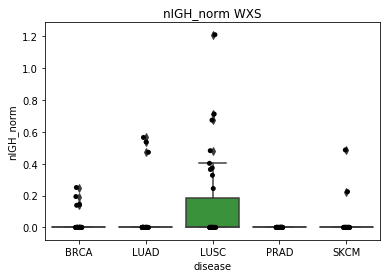

In [176]:
import seaborn as sns  #be sure version >=0.9
sns.boxplot(x="disease", y="nIGH_norm", data=data_imrep_WXS)
ax=sns.stripplot(x="disease", y="nIGH_norm", data=data_imrep_WXS, palette=["black"], jitter=0.05)
ax.set_title('nIGH_norm WXS')

Text(0.5,1,'loadIGH WXS')

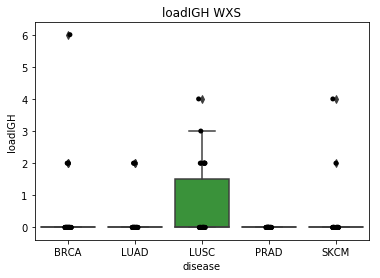

In [168]:
import seaborn as sns  #be sure version >=0.9
sns.boxplot(x="disease", y="loadIGH", data=data_imrep_WXS)
ax=sns.stripplot(x="disease", y="loadIGH", data=data_imrep_WXS, palette=["black"], jitter=0.05)
ax.set_title('loadIGH WXS')

Text(0.5,1,'alphaIGH WXS')

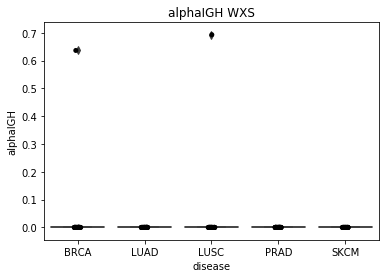

In [169]:
import seaborn as sns  #be sure version >=0.9
sns.boxplot(x="disease", y="alphaIGH", data=data_imrep_WXS)
ax=sns.stripplot(x="disease", y="alphaIGH", data=data_imrep_WXS, palette=["black"], jitter=0.05)
ax.set_title('alphaIGH WXS')

Text(0.5,1,'nTCRA WXS')

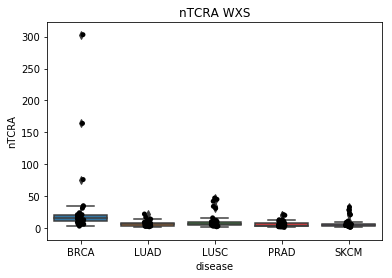

In [170]:
import seaborn as sns  #be sure version >=0.9
sns.boxplot(x="disease", y="nTCRA", data=data_imrep_WXS)
ax=sns.stripplot(x="disease", y="nTCRA", data=data_imrep_WXS, palette=["black"], jitter=0.05)
ax.set_title('nTCRA WXS')

Text(0.5,1,'loadTCRA WXS')

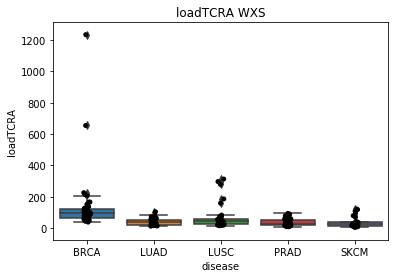

In [171]:
import seaborn as sns  #be sure version >=0.9
sns.boxplot(x="disease", y="loadTCRA", data=data_imrep_WXS)
ax=sns.stripplot(x="disease", y="loadTCRA", data=data_imrep_WXS, palette=["black"], jitter=0.05)
ax.set_title('loadTCRA WXS')

In [1]:
import seaborn as sns  #be sure version >=0.9
sns.boxplot(x="disease", y="alphaTCRB", data=data_imrep_WXS)
ax=sns.stripplot(x="disease", y="alphaTCRB", data=data_imrep_WXS, palette=["black"], jitter=0.05)
ax.set_title('alphaTCRB WXS')

NameError: name 'data_imrep_WXS' is not defined